In [10]:
# Tried to predict count without using count as a feature, 
# difficult to predict the extreme values, prediction follows the overall trend instead. 
# Thinking of ideas how to correctly predict values further from the mean.
# Used notebook on kaggle.com. Not possible to save files, model and prediction therefor in same cell.
# %matplotlib notebook to show interactive graphs, hopefully no dependencies 

# DT069A Laboration 2
# This code will need tensorflow, pandas, and numpy to be installed. Use pip to install them.
# EFH - seaborn and sklearn also need to be installed

# For interactive plots
%matplotlib notebook
# Requires javascript for jupyter lab
#import matplotlib.ipympl
#%matplotlib widget
# Fallback
#%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec

# for use with kaggle, directory for dataset
#import os
#os.chdir("/kaggle/input/london-bike-sharing-dataset")

# Imports
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Read dataset from file
df = pd.read_csv(
    #"london_merged.csv", #for use with kaggle and built in dataset
    "LSTMdataset.csv", #for use with LSTM dataset
    parse_dates=['timestamp'],
    index_col="timestamp"
)

# Show first 5 rows of dataframe
df.head()

# Expanded index, to put information in different columns
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month


In [11]:
# Calculate and plot Pearsons correlation between variables, investigating linear correlations
corr_mat = df.corr()
corr_mat.style.background_gradient(cmap='coolwarm').set_precision(2)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
cnt,1.00,0.39,0.37,-0.46,0.12,-0.17,-0.05,-0.10,-0.12,0.32,-0.02,-0.07,0.06
t1,0.39,1.00,0.99,-0.45,0.15,-0.10,-0.04,-0.01,-0.29,0.17,0.01,-0.00,0.33
t2,0.37,0.99,1.00,-0.40,0.09,-0.10,-0.04,-0.01,-0.29,0.15,0.01,-0.01,0.37
hum,-0.46,-0.45,-0.40,1.00,-0.29,0.33,0.03,0.03,0.29,-0.30,-0.02,0.01,0.11
wind_speed,0.12,0.15,0.09,-0.29,1.00,0.12,-0.00,0.01,0.01,0.14,0.00,0.00,-0.09
weather_code,-0.17,-0.10,-0.10,0.33,0.12,1.00,0.01,0.04,0.10,-0.04,0.00,0.02,-0.03
is_holiday,-0.05,-0.04,-0.04,0.03,-0.00,0.01,1.00,-0.09,-0.03,-0.00,0.04,-0.14,-0.01
is_weekend,-0.10,-0.01,-0.01,0.03,0.01,0.04,-0.09,1.00,0.00,0.00,0.01,0.79,-0.01
season,-0.12,-0.29,-0.29,0.29,0.01,0.10,-0.03,0.00,1.00,0.00,-0.01,0.00,0.20
hour,0.32,0.17,0.15,-0.30,0.14,-0.04,-0.00,0.00,0.00,1.00,-0.00,0.00,-0.00


<IPython.core.display.Javascript object>


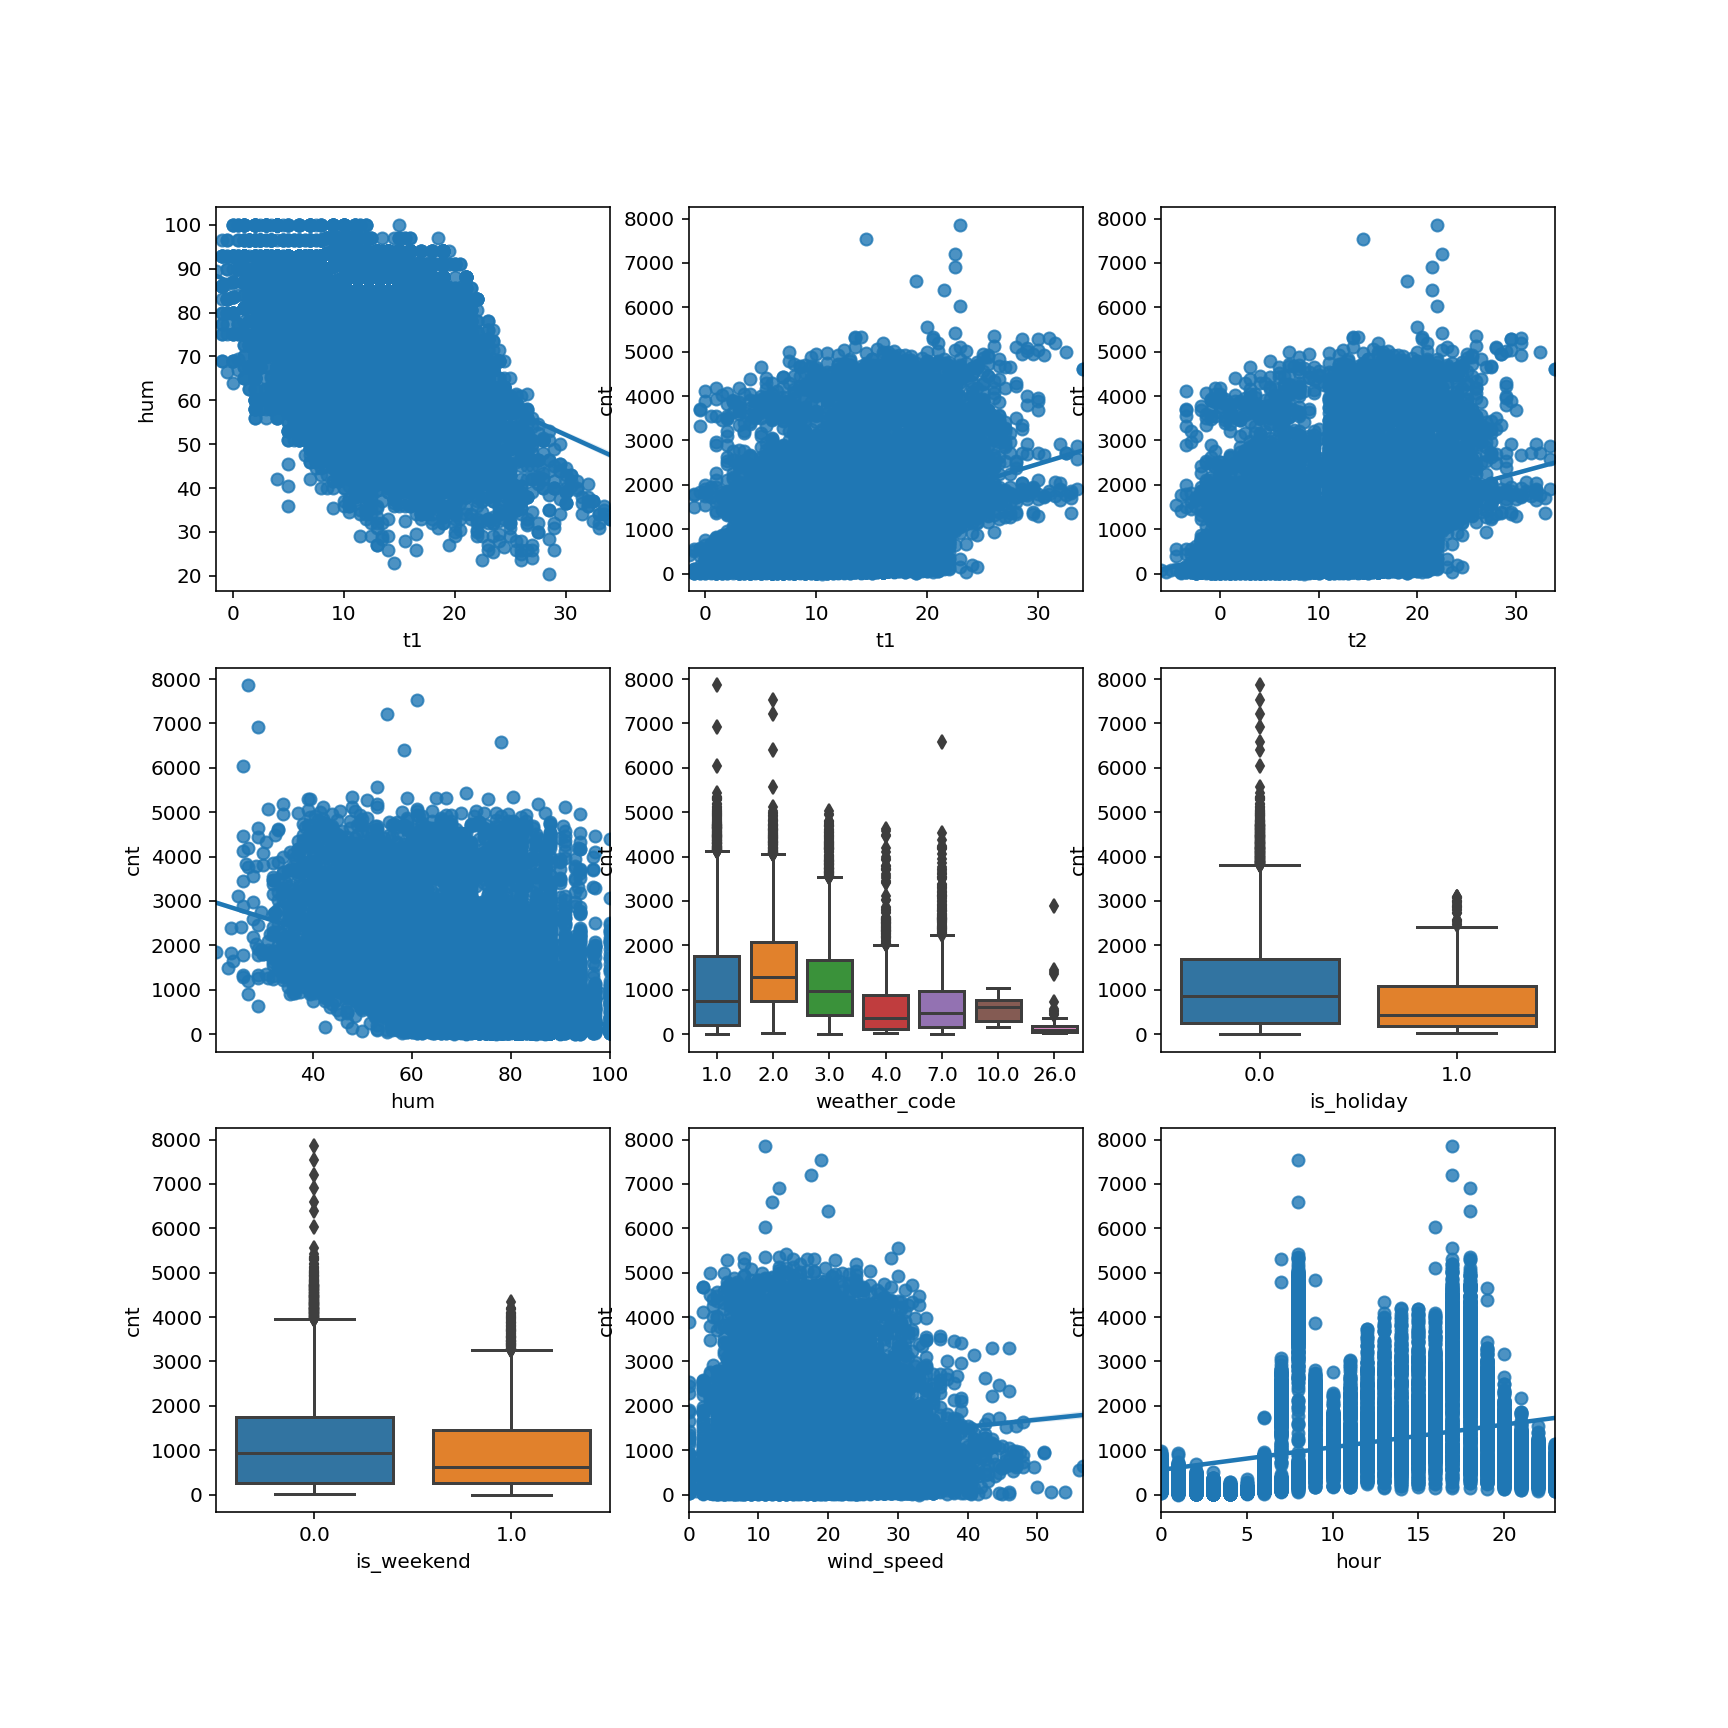

<AxesSubplot:xlabel='hour', ylabel='cnt'>

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
sns.regplot(ax=axes[0,0], x="t1", y="hum", data=df)
sns.regplot(ax=axes[0,1], x="t1", y="cnt", data=df)
sns.regplot(ax=axes[0,2], x="t2", y="cnt", data=df)
sns.regplot(ax=axes[1,0], x="hum", y="cnt", data=df)
sns.boxplot(ax=axes[1,1], x="weather_code", y="cnt", data=df)
sns.boxplot(ax=axes[1,2], x="is_holiday", y="cnt", data=df)
sns.boxplot(ax=axes[2,0], x="is_weekend", y="cnt", data=df)
sns.regplot(ax=axes[2,1], x="wind_speed", y="cnt", data=df)
sns.regplot(ax=axes[2,2], x="hour", y="cnt", data=df)

<IPython.core.display.Javascript object>


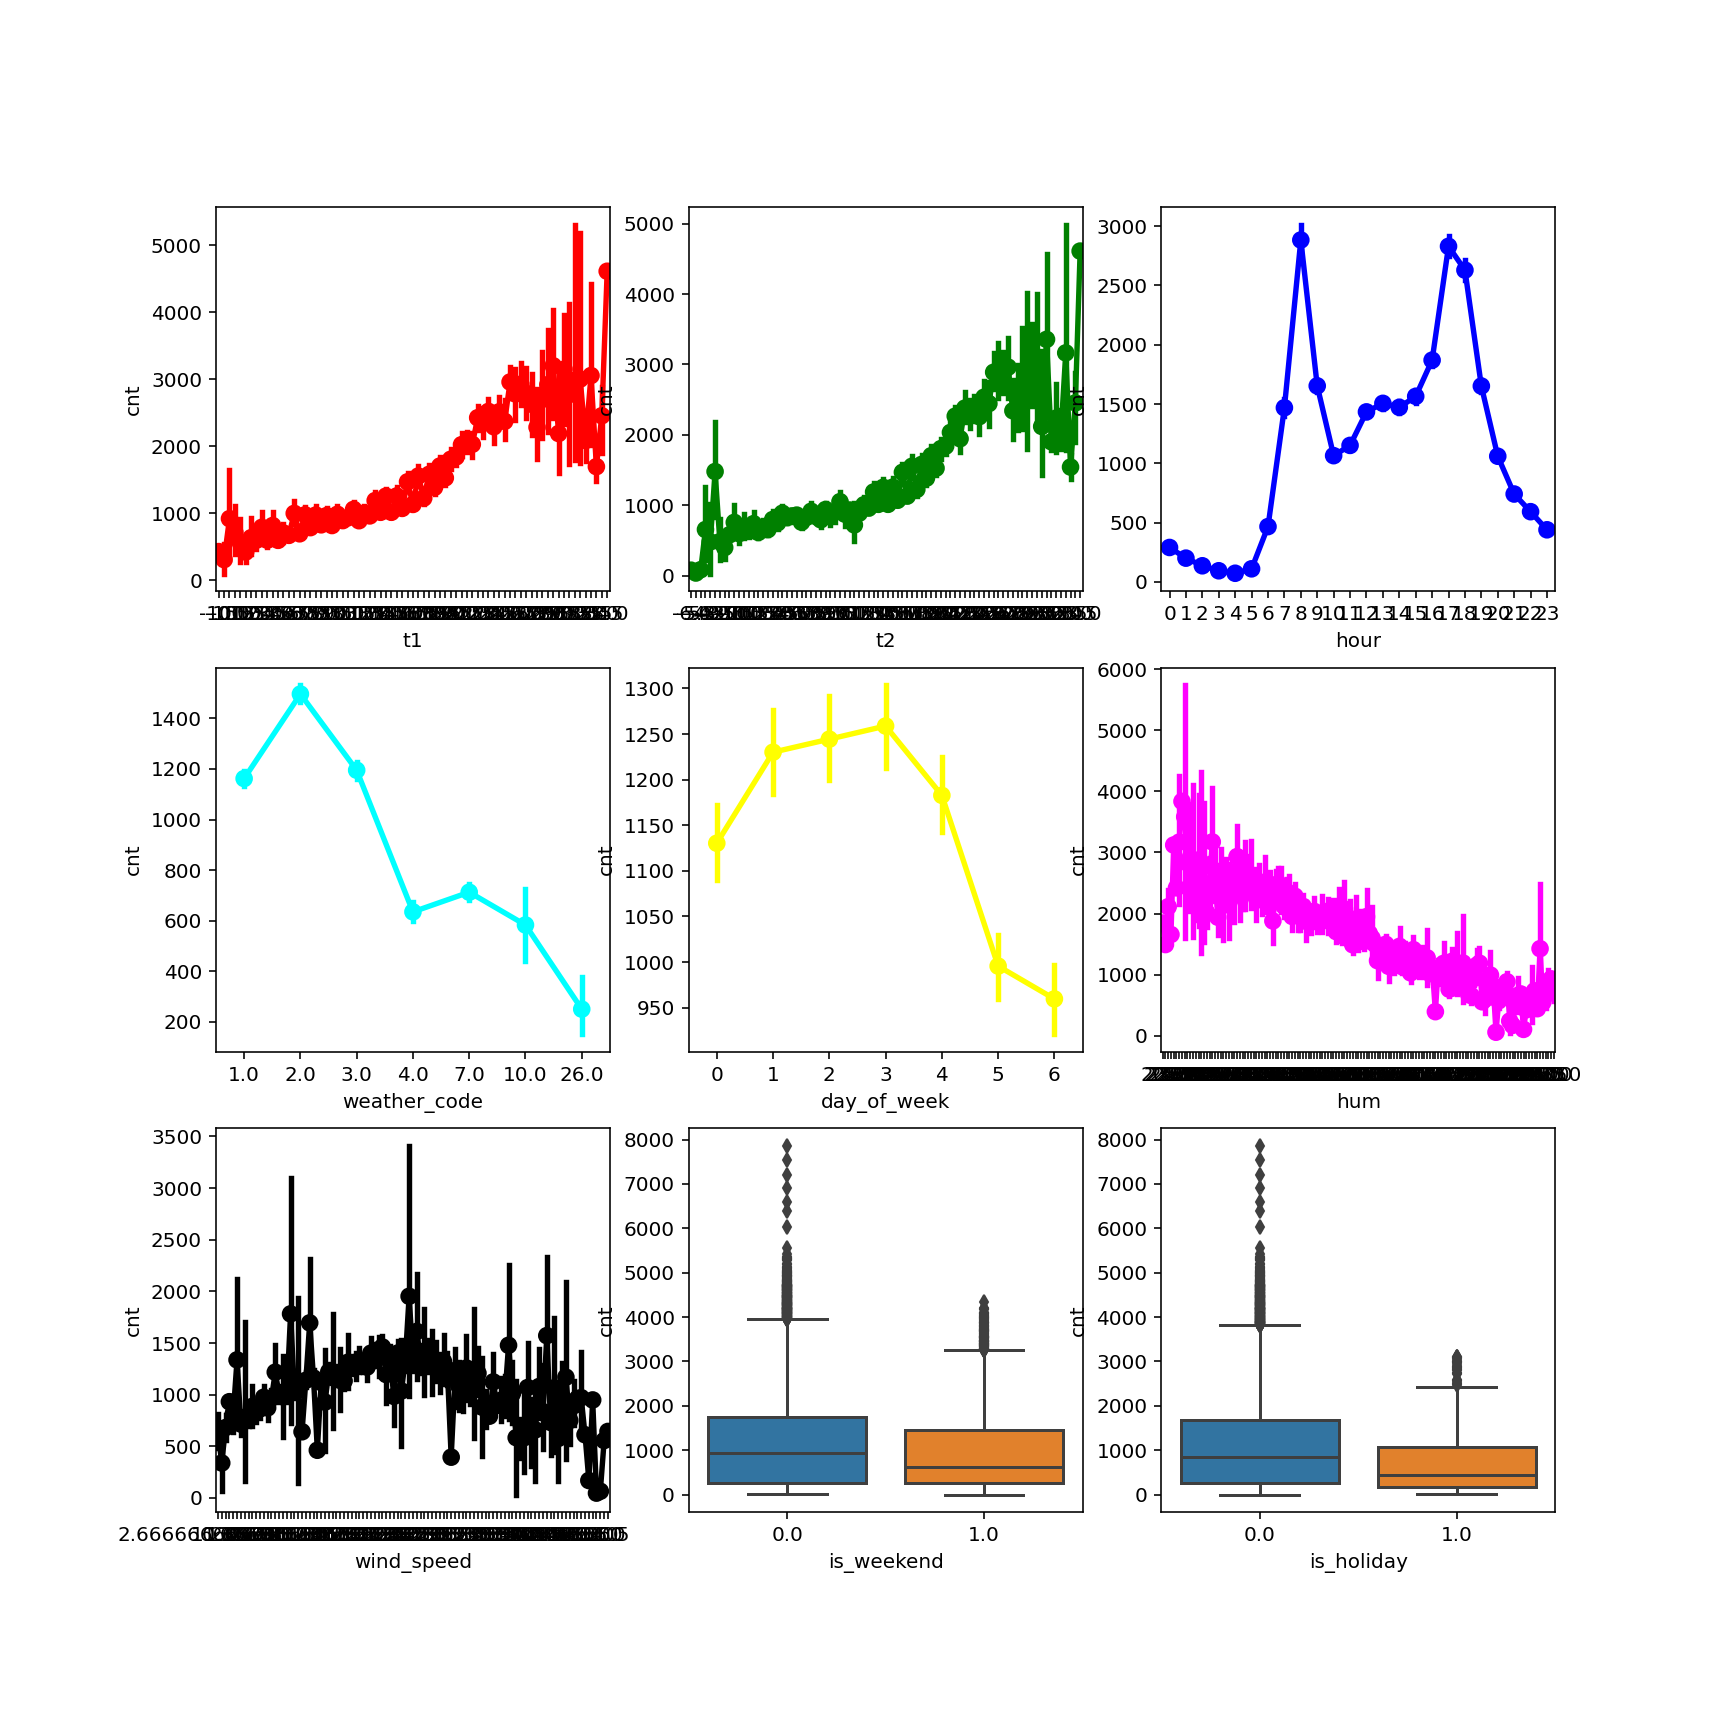

<AxesSubplot:xlabel='is_holiday', ylabel='cnt'>

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
sns.pointplot(ax=axes[0,0], x='t1',y='cnt',data=df, color="red")
sns.pointplot(ax=axes[0,1], x='t2',y='cnt', data=df, color="green")
sns.pointplot(ax=axes[0,2], x="hour", y="cnt", data=df, color="blue")
sns.pointplot(ax=axes[1,0], x="weather_code", y="cnt", data=df, color="cyan")
sns.pointplot(ax=axes[1,1], x="day_of_week", y="cnt", data=df, color="yellow")
sns.pointplot(ax=axes[1,2], x="hum", y="cnt", data=df, color="magenta")
sns.pointplot(ax=axes[2,0], x="wind_speed", y="cnt", data=df, color="black")
sns.boxplot(ax=axes[2,1], x="is_weekend", y="cnt", data=df)
sns.boxplot(ax=axes[2,2], x="is_holiday", y="cnt", data=df)

<IPython.core.display.Javascript object>


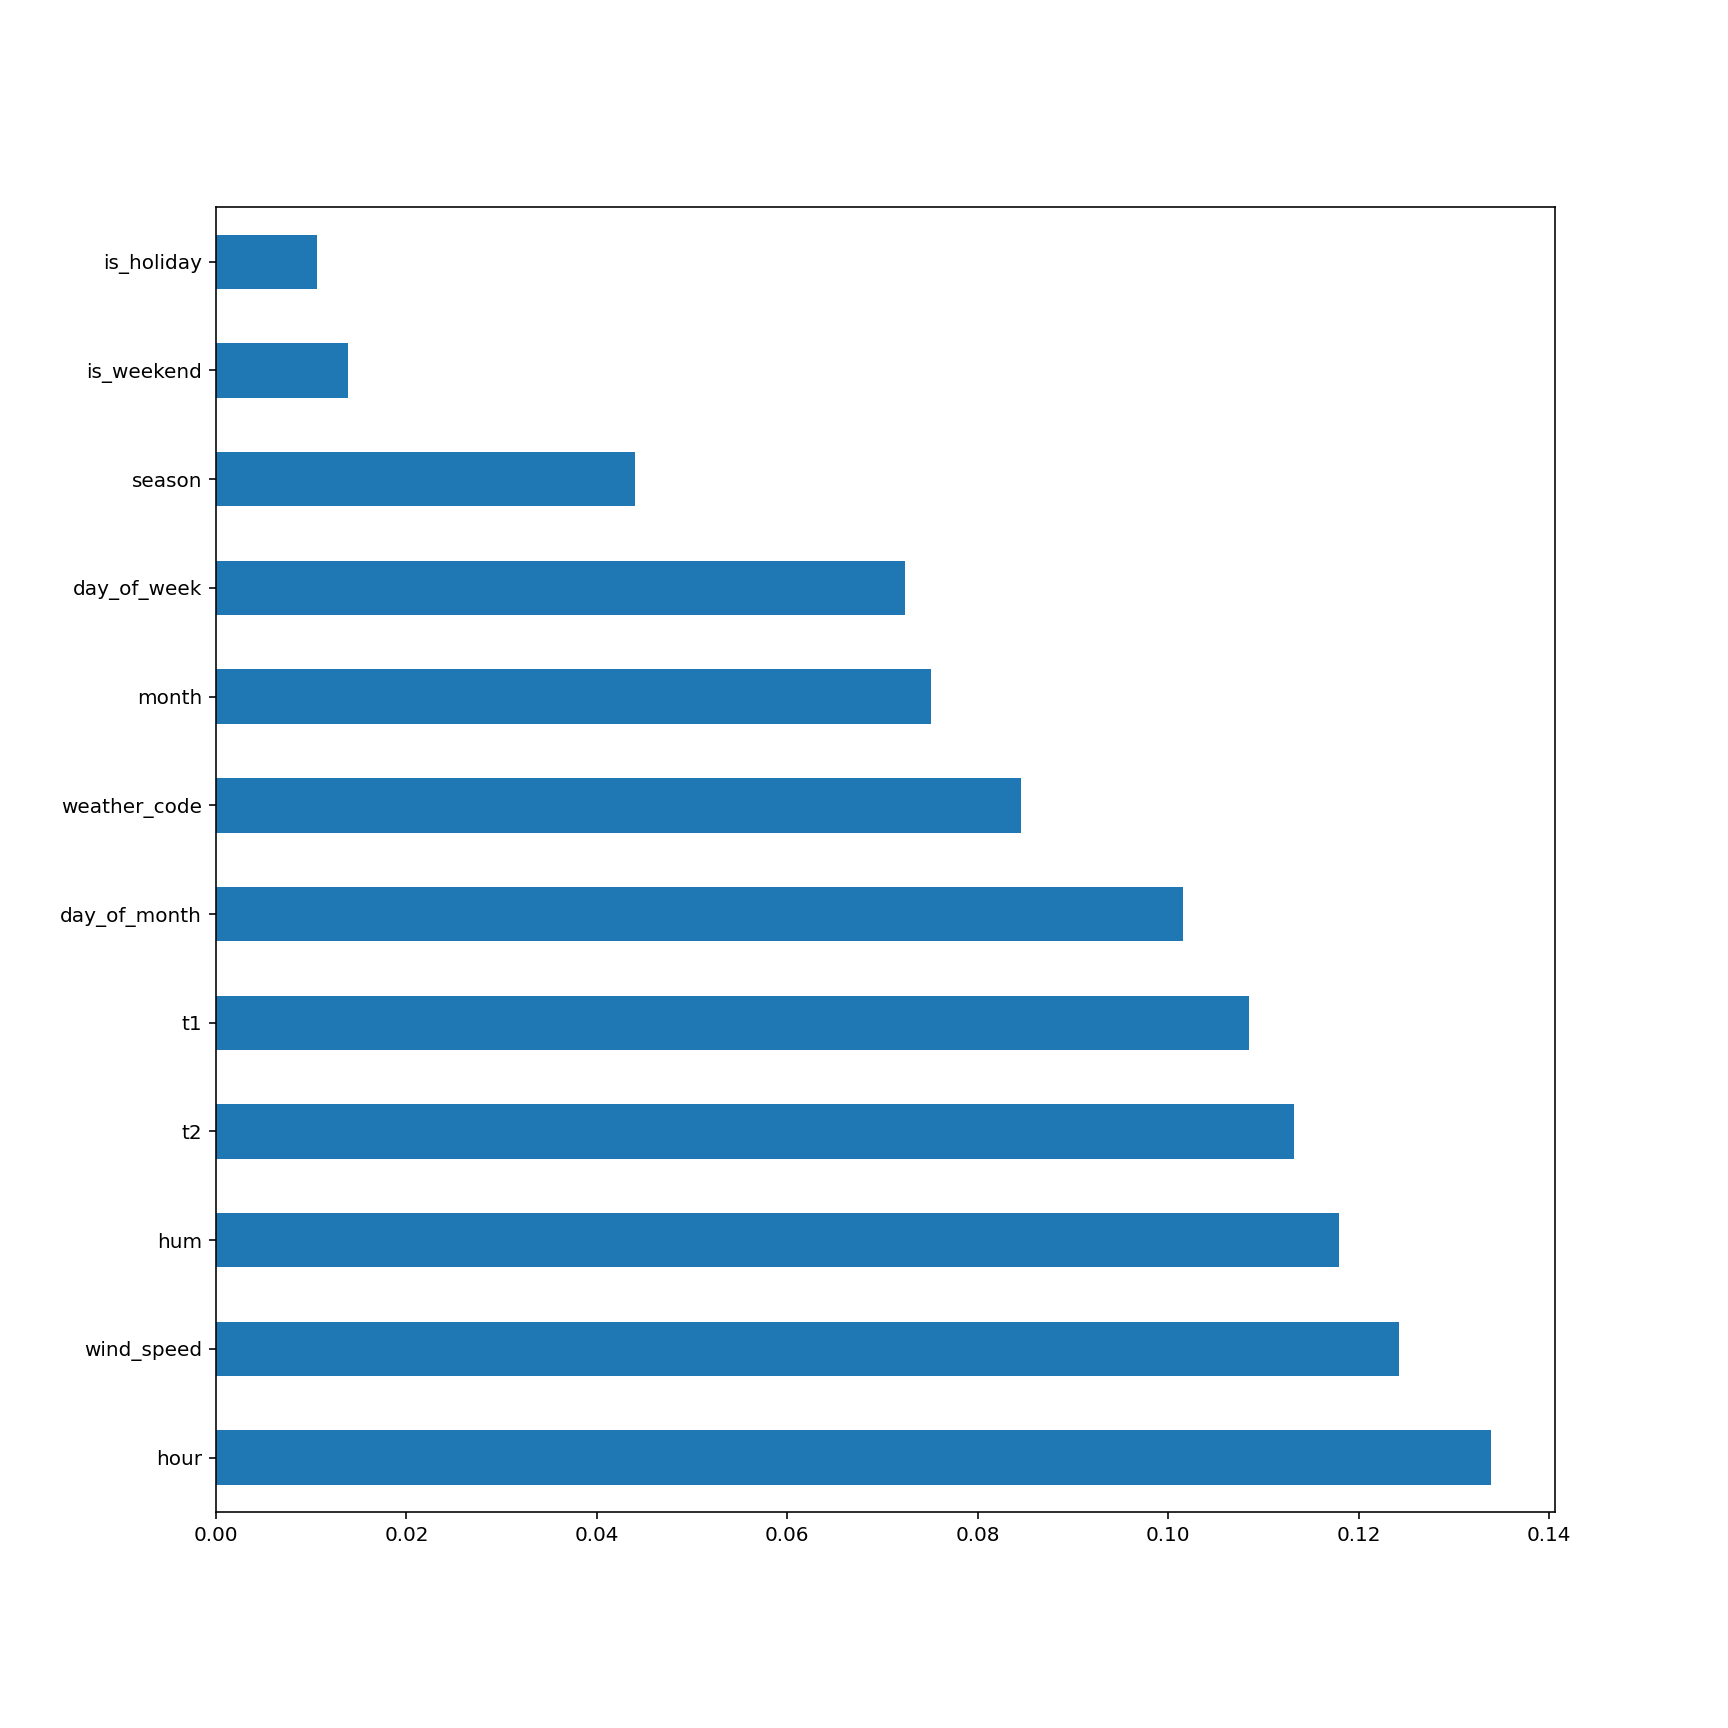

[0.10849805 0.11325538 0.11794571 0.12428009 0.08454062 0.01065494
 0.01391199 0.0439812  0.13393815 0.10150208 0.07236818 0.07512361]


In [14]:
# If not enough memory, reduce max_depth

from sklearn.ensemble import ExtraTreesClassifier

plt.figure(figsize=(12,12))
model = ExtraTreesClassifier(max_depth=12, bootstrap=True)
model.fit(df.iloc[:,1:],df['cnt'])
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=(df.iloc[:,1:]).columns)
feat_importances.nlargest(12).plot(kind='barh')

plt.show()

In [15]:
# Filter out which columns to use
# Trying to predict without using 'cnt' as feature

# seems to work well with low validation error.
columns = ['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_weekend', 'is_holiday', 'hour']

# does not seem to work well just taking top from extratreeclassifer
#columns = ['cnt', 'hour', 'wind_speed', 'hum', 't2', 't1', 'day_of_month', 'weather_code', 'month', 'day_of_week']

# Dataframe with only chosen columns
df = df.loc[:, columns]

Predicting number of bike rented for  24  hours. 

Please enter starting hour to predict from: 

0
                      cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                              
2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00    47  2.0  0.0   93.0         6.5           1.0   
2015-01-04 05:00:00    46  2.0  2.0   93.0         4.0           1.0   
2015-01-04 06:00:00    51  1.0 -1.0  100.0         7.0           4.0   
2015-01-04 07:00:00    75  1.0 -1.0  100.0         7.0           4.0   
2015-01-04 08:00:00   131  1.5 -1.0   96.5         8.0           4.0   
2015-01-04 09:00:00   301  2.0 -0.5  100.0         9.0           3.0   
2015-01-04 10:00:00   528  3.0 -0.5   93.0        12.0           3.0   
2015-01-04 11:00:00   727  2.0 -1.5  

218/218 [==============================] - 2s 11ms/step - loss: 0.1132 - val_loss: 0.1043
Epoch 49/150
218/218 [==============================] - 3s 12ms/step - loss: 0.1133 - val_loss: 0.1056
Epoch 50/150
218/218 [==============================] - 2s 11ms/step - loss: 0.1091 - val_loss: 0.1169
Epoch 51/150
218/218 [==============================] - 2s 11ms/step - loss: 0.1164 - val_loss: 0.1047
Epoch 52/150
218/218 [==============================] - 2s 11ms/step - loss: 0.1121 - val_loss: 0.1030
Epoch 53/150
218/218 [==============================] - 3s 12ms/step - loss: 0.1110 - val_loss: 0.1034
Epoch 54/150
218/218 [==============================] - 3s 11ms/step - loss: 0.1112 - val_loss: 0.1138
Epoch 55/150
218/218 [==============================] - 2s 11ms/step - loss: 0.1078 - val_loss: 0.1070
Epoch 56/150
218/218 [==============================] - 2s 11ms/step - loss: 0.1121 - val_loss: 0.1062
Epoch 57/150
218/218 [==============================] - 3s 11ms/step - loss: 0.1123 - 

218/218 [==============================] - 2s 11ms/step - loss: 0.0972 - val_loss: 0.0992
Epoch 128/150
218/218 [==============================] - 2s 11ms/step - loss: 0.0982 - val_loss: 0.1010
Epoch 129/150
218/218 [==============================] - 2s 11ms/step - loss: 0.0952 - val_loss: 0.0961
Epoch 130/150
218/218 [==============================] - 3s 11ms/step - loss: 0.1004 - val_loss: 0.0948
Epoch 131/150
218/218 [==============================] - 3s 12ms/step - loss: 0.0974 - val_loss: 0.1056
Epoch 132/150
218/218 [==============================] - 2s 11ms/step - loss: 0.0993 - val_loss: 0.0949
Epoch 133/150
218/218 [==============================] - 2s 11ms/step - loss: 0.0954 - val_loss: 0.0969
Epoch 134/150
218/218 [==============================] - 3s 12ms/step - loss: 0.0955 - val_loss: 0.0941
Epoch 135/150
218/218 [==============================] - 2s 11ms/step - loss: 0.0967 - val_loss: 0.0991
Epoch 136/150
218/218 [==============================] - 2s 11ms/step - loss: 

<IPython.core.display.Javascript object>


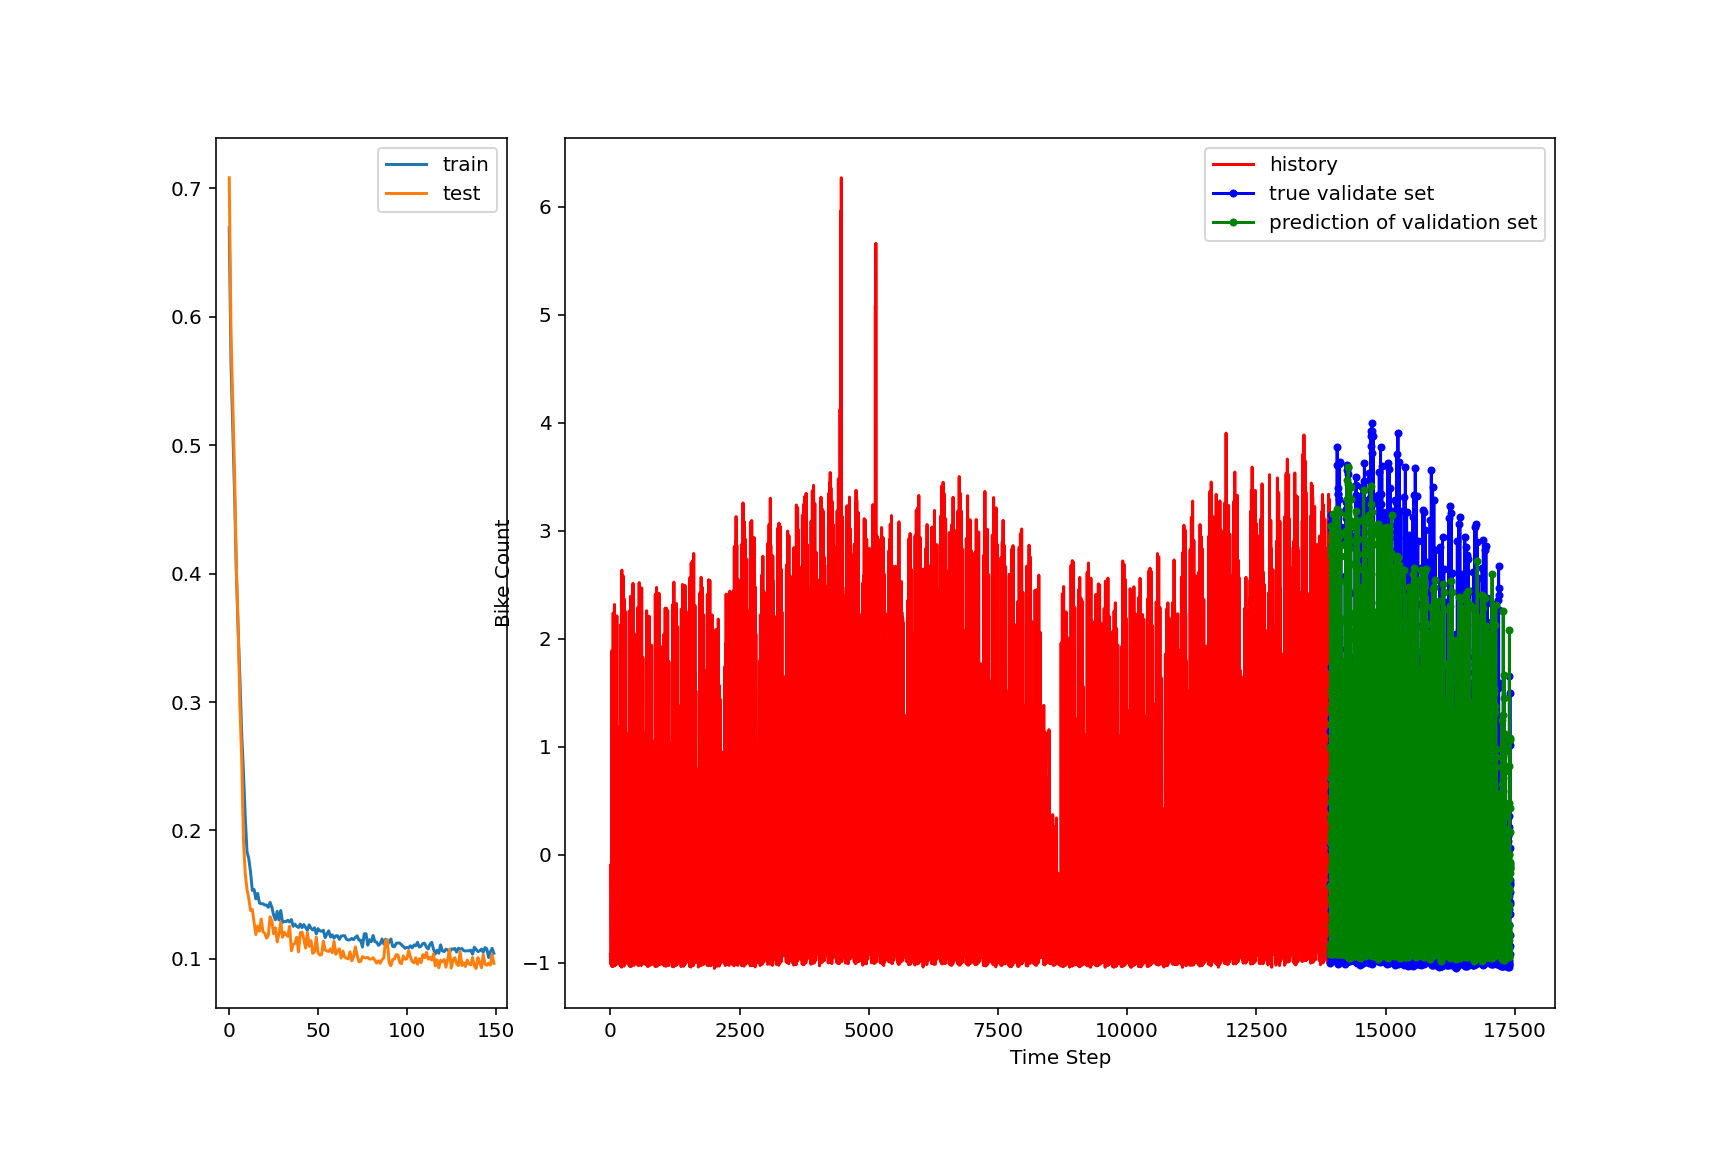

Estimated bike rentals for next  24  hours:  [ 243  210  171  155  145  212  314  490  705  881 1066 1120 1183 1172
 1116 1037  986  825  719  634  552  461  356  275]
(Should be around:  [138, 134, 72, 47, 46, 51, 75, 131, 301, 528, 727, 862, 916, 1039, 869, 737, 594, 522, 379, 328, 221, 178, 157, 83]  for the example data)


In [16]:
# Build model and precict.

# Imports - some imported above
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout , LSTM , Bidirectional 
from keras.regularizers import L1L2

# Input to model
hours_to_predict = 24
window_in = 5
batch_in = 64
epoch_in = 150
print("Predicting number of bike rented for ",hours_to_predict," hours. \n")
print("Please enter starting hour to predict from: \n")
startar = input()
startar = int(startar)

# Split data into train set (first 80%) and validation set (last 20%)
train_df_size = int(len(df) * 0.8)
validate_df_size = int((len(df) - train_df_size))
train_df = df.iloc[:train_df_size]
validate_df = df.iloc[train_df_size:]
print(train_df.iloc[(startar+1):(startar+1+hours_to_predict),:])  # Inspect the dataframe

# Separate the data frames into x and y values, with Y set to predict the next step
y_train = train_df.iloc[1:, 0].values  # Separate the cnt column as y, start at index 1 (what we want to predict)
x_train = train_df.iloc[:-1, 1:].values  # Do not include the last element, to match size, remove target
y_validate = validate_df.iloc[1:, 0].values  # Separate the cnt column as y, start at index 1 (what we want to predict)
x_validate = validate_df.iloc[:-1, 1:].values  # Do not include the last element, to match size, remove target

# Scalers, for x an y separate
scaler_x = StandardScaler()
scaler_y = StandardScaler()

# Standardization
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_validate = scaler_y.transform(y_validate.reshape(-1, 1))
x_train = scaler_x.fit_transform(x_train)
x_validate = scaler_x.transform(x_validate)

# Create the batch datasets with moving windows
window_size = window_in
train_batch = tf.keras.preprocessing.timeseries_dataset_from_array(
    data=x_train,
    targets=y_train,
    sequence_length=window_size,
    sequence_stride=1,
    shuffle=False,
    batch_size=batch_in)
validate_batch = tf.keras.preprocessing.timeseries_dataset_from_array(
    data=x_validate,
    targets=y_validate,
    sequence_length=window_size,
    sequence_stride=1,
    shuffle=False,
    batch_size=batch_in)

# Regularization parameters
l1 = 0.0001
l2 = 0.0001
dropout_param = 0.5

# Define the LSTM model
lstm_model = tf.keras.models.Sequential([
    #tf.keras.layers.LSTM(units=10),
    #tf.keras.layers.Bidirectional(LSTM(32, activation='relu', bias_regularizer=L1L2(l1, l2), kernel_regularizer=L2(l1, l2), recurrent_dropout=0.4), return_sequences=True),  merge_mode='sum'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(LSTM(32, activation='relu', kernel_regularizer=L1L2(l1, l2)), merge_mode='concat'), 
    tf.keras.layers.Dropout(dropout_param),
    tf.keras.layers.Dense(units=1)
])
    
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the LSTM model
history = lstm_model.fit(
    train_batch,
    epochs=epoch_in,
    batch_size=batch_in,
    validation_data=validate_batch,
    shuffle=False,
)

# Create the prediction dataset, without the known Y target values
predict_batch = tf.keras.preprocessing.timeseries_dataset_from_array(
    data=x_validate,
    targets=None,
    sequence_length=window_size,
    sequence_stride=1,
    shuffle=False,
    batch_size=batch_in)

# Predict the future
y_predicted = lstm_model.predict(predict_batch)

# Plot the loss/val_loss and the predicted values
plt.figure(figsize=(12, 8))
gs = GridSpec(1, 4)
plt.subplot(gs[0, 0])
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.subplot(gs[0, 1:])
plt.plot(np.arange(0, len(y_train)), y_train, color='r', label="history")  # Uncomment to see training data as well
plt.plot(np.arange(len(y_train), len(y_train) + len(y_validate)), y_validate, color='b', marker='.',
         label="true validate set")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_predicted)), y_predicted, color='g', marker='.',
         label="prediction of validation set")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show()

# DT069A Laboration 2 TestPrediction

# Part of x_train to use for prediction selected in for-loop
x_predict = x_train

# List for predictions
listan =  np.array([])

for i in range(0,hours_to_predict):
    # Create a working batch
    window_size = window_in
    predict_batch = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=x_predict[i+startar:(i+startar+window_size),:],
        targets=None,
        sequence_length=window_size,
        sequence_stride=1,
        shuffle=False,
        batch_size=batch_in)

    # Predict using model
    y_predicted = lstm_model.predict(predict_batch)
    
    # Inverse transform
    y_predicted = scaler_y.inverse_transform(y_predicted)
    
    # Append list
    listan = np.append(listan, y_predicted)

# Interpret the results
print("Estimated bike rentals for next ",hours_to_predict," hours: ", listan.astype('int'))
df_out = train_df.iloc[(startar+1):(startar+1+hours_to_predict),0]
print("(Should be around: ",df_out.to_list()," for the example data)")


In [17]:
conda list #kaggle packages

# packages in environment at /opt/conda:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       1_gnu    conda-forge
abseil-cpp                20200923.2           h9c3ff4c_1    conda-forge
absl-py                   0.10.0                   pypi_0    pypi
adal                      1.2.5              pyh9f0ad1d_0    conda-forge
affine                    2.3.0                    pypi_0    pypi
aiobotocore               1.2.1                    pypi_0    pypi
aiohttp                   3.7.3            py37h5e8e339_0    conda-forge
aiohttp-cors              0.7.0                    pypi_0    pypi
aioitertools              0.7.1                    pypi_0    pypi
aioredis                  1.3.1                    pypi_0    pypi
albumentations            0.5.2                    pypi_0    pypi
alembic                   1.5.4                    pypi_0    py


Note: you may need to restart the kernel to use updated packages.
